# Machine Learning

## 1. Data Prep 
* 1.1 Import CSV
* 1.2 Basic EDA
* 1.3 Prepare for ML Models

## 2. Models
* 2.1 Decision Tree
* 2.2 Decision Tree with pruning
* 2.3 Random Forest
* 2.4 KNN
* 2.5  Neural Network


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

# sklearn packages
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report 

# plotting
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set() 

## 1. Data Prep

### 1.1 Import CSV

In [2]:
games = pd.read_csv('games.csv')

In [3]:
games.head()

team  gameWeek  win  grid6Simple pass  grid6Touch  \
0  Real Sociedad        38    0                27           3   
1  Real Sociedad        37    2                77           7   
2  Real Sociedad        36    0                44           9   
3  Real Sociedad        34    0                69           9   
4  Real Sociedad        33    2                30           7   

   grid6Ground loose ball duel  grid6Ground attacking duel  \
0                            1                           5   
1                            1                           0   
2                            2                           2   
3                            2                           1   
4                            0                           2   

   grid6Ground defending duel  grid6Air duel  grid6Smart pass  ...  \
0                          12              0                0  ...   
1                           5              8                0  ...   
2                           5              4                0  ...   
3                           3              4                0  ...   
4                           1              1                0  ...   

   grid3Smart pass  grid3Shot  grid3Acceleration  grid3Head pass  grid3Cross  \
0                0          0                  0               0           0   
1                0          0                  0               0           0   
2                0          0                  0               1           0   
3                0          0                  0               0           0   
4                0          0                  0               1           0   

   grid3High pass  grid3Clearance  grid3Free Kick  grid3Corner  \
0               1               4               0            0   
1               2               0               0            0   
2               2               0               2            0   
3               4               0               0            0   
4               3               3               0            0   

   grid3Free kick cross  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 260 columns]

### 1.2 Basic EDA

array([[<AxesSubplot:title={'center':'win'}>]], dtype=object)

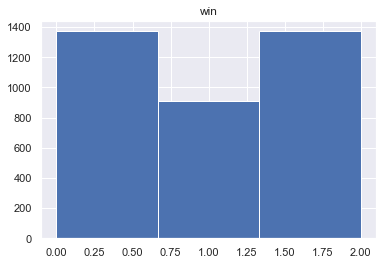

In [4]:
games.hist('win', bins=3)

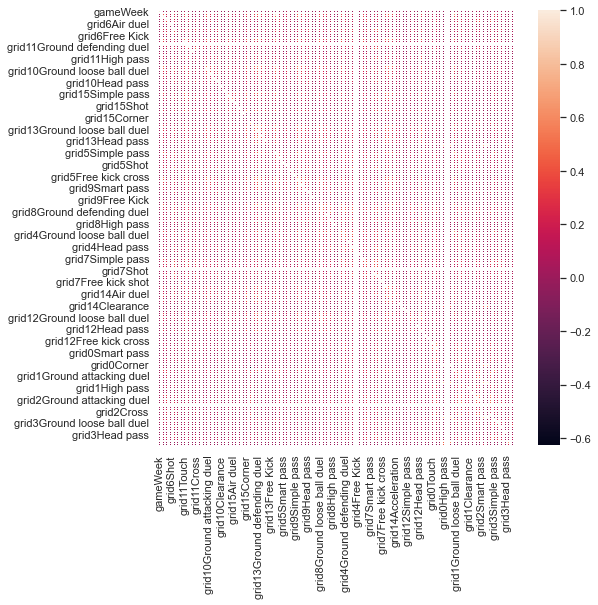

In [5]:
f, ax = plt.subplots(figsize=(8, 8))
_ = sns.heatmap(games.corr(), linewidths=.01, ax=ax)

In [6]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Columns: 260 entries, team to grid3Free kick cross
dtypes: int64(259), object(1)
memory usage: 7.2+ MB


### 1.3 Prepare for ML Models
#### Convert target from an integer

In [7]:
games['win'] = games['win'].astype(str)

0    1372
1     908
2    1372
Name: win, dtype: int64


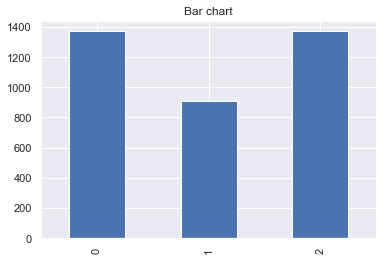

In [8]:
count=pd.value_counts(games.win, sort= False)
count.plot(kind= 'bar')
plt.title('Bar chart')

print(count)

#### We are splitting the data on season of the year with the goal of leveraging the first 2/3 of the season to predict the end of the season.

In [9]:
games_test = games[games.gameWeek > 24]
games_train = games[games.gameWeek <=24]

In [10]:
games_train.drop(['gameWeek','team'], axis=1, inplace=True)
games_test.drop(['gameWeek','team'], axis=1, inplace=True)

In [11]:
#gather up names of all the columns
cols = games_train.columns

#set the prediction column and the feature columns for KNN
prediction_col = 'win'
feature_cols = [c for c in cols if c != prediction_col]

x_train = games_train[feature_cols].values
y_train = games_train[prediction_col].values

x_test = games_test[feature_cols].values
y_test = games_test[prediction_col].values

In [12]:
# Scale the data to be between -1 and 1
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

## 2. Models

### 2.1 Decision Tree

In [13]:
# establish and fit the model using DecisonTree()
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(x_train, y_train)

#gathering the predictions
predictions = tree_model.predict(x_test)

#### Look for importance features.

In [14]:
# display the importance features

importance_list = list(zip(feature_cols,tree_model.feature_importances_))
sorted_import_feature = sorted(importance_list, key = lambda x: x[1],reverse=True)
max_feature_len = len(max(feature_cols, key=len))

for feature, rank in sorted_import_feature:
    dots = max_feature_len - len(feature)
    print(f'{feature}: {"."*dots} {rank:.2f}')

grid15Reflexes: .............. 0.07
grid0Reflexes: ............... 0.06
grid13Shot: .................. 0.03
grid2Air duel: ............... 0.02
grid11Simple pass: ........... 0.02
grid8Cross: .................. 0.01
grid1Air duel: ............... 0.01
grid11Head pass: ............. 0.01
grid13Air duel: .............. 0.01
grid1Ground defending duel: .. 0.01
grid14Air duel: .............. 0.01
grid4Air duel: ............... 0.01
grid9Simple pass: ............ 0.01
grid11Ground loose ball duel:  0.01
grid2Simple pass: ............ 0.01
grid11Cross: ................. 0.01
grid4High pass: .............. 0.01
grid1Ground attacking duel: .. 0.01
grid9High pass: .............. 0.01
grid2Touch: .................. 0.01
grid4Simple pass: ............ 0.01
grid8Simple pass: ............ 0.01
grid9Ground loose ball duel: . 0.01
grid10Air duel: .............. 0.01
grid3Simple pass: ............ 0.01
grid8Ground attacking duel: .. 0.01
grid14Shot: .................. 0.01
grid6Air duel: .............

#### There is not a lot to tease out of this except that reflexes and shots have somewhat of a greater importance than everything else.

In [15]:
# establish and fit the model using DecisonTree()
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(x_train, y_train)

#gathering the predictions
predictions = tree_model.predict(x_test)

#### Assess the results

0    484
1    332
2    484
dtype: int64


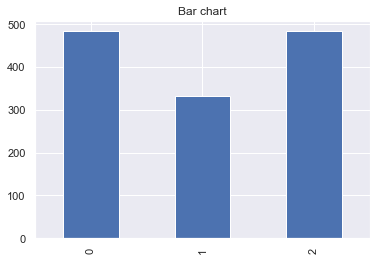

In [16]:
test_by_count=pd.value_counts(y_test, sort= False)
test_by_count.plot(kind= 'bar')
plt.title('Bar chart')

print(test_by_count)

0    490
1    315
2    495
dtype: int64


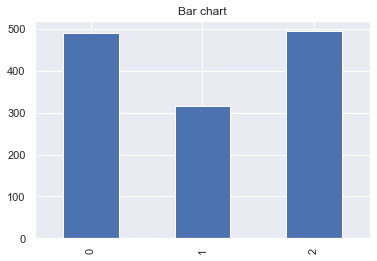

In [17]:
preds_by_count=pd.value_counts(predictions, sort= False)
preds_by_count.plot(kind= 'bar')
plt.title('Bar chart')

print(preds_by_count)

In [18]:
con_mat = confusion_matrix(y_test, predictions)
print(con_mat)
print('Accuracy Score :', accuracy_score(y_test, predictions) )

[[281 114  89]
 [105 100 127]
 [104 101 279]]
Accuracy Score : 0.5076923076923077


Text(0, -0.05, 'Confusion Matrix')

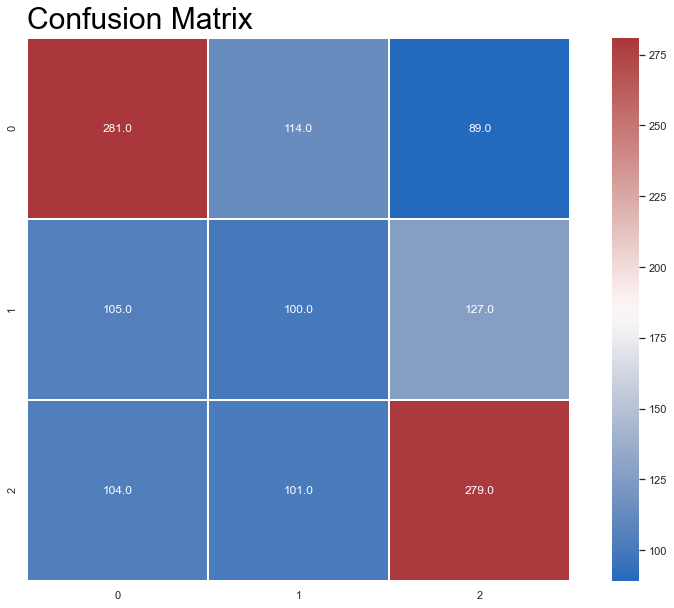

In [19]:
f, ax = plt.subplots(figsize=(15, 10))
_ = sns.heatmap(con_mat, annot=True, linewidths=1, ax=ax, cmap='vlag', fmt=".1f", square=True)
plt.text(0,-0.05, "Confusion Matrix", fontsize = 30, color='Black')

In [20]:
print(accuracy_score(y_test,predictions))

0.5076923076923077


In [21]:
#testing for overfitting by measuring against the test data
predictions = tree_model.predict(x_train)

print(accuracy_score(y_train,predictions))

1.0


In [22]:
# Visualize data 

import pydotplus
#from sklearn import tree (already imported)
import collections

dot_data = tree.export_graphviz(tree_model,
                                feature_names=feature_cols,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree_unpruned.png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.808982 to fit



True

In [23]:
#display the png here
from IPython.display import Image

Image(filename='tree_unpruned.png') 

### 2.2 Decision Tree with pruning

Definitely over-fitting the data, so on to pruning. The following section was retrieved from:https://medium.com/datadriveninvestor/decision-tree-adventures-2-explanation-of-decision-tree-classifier-parameters-84776f39a28

   max_depth   accuracy
0        2.0  56.307692
1        3.0  56.000000
2        4.0  55.461538
3        5.0  56.153846
4        6.0  53.000000
5        7.0  54.923077
6        8.0  54.384615
7        9.0  53.384615
8       10.0  50.615385



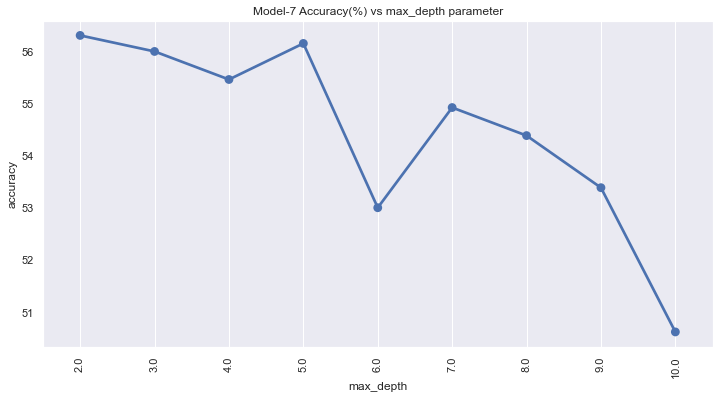

In [24]:
c_parameter_name = 'max_depth'
c_parameter_values = [2,3,4,5,6,7,8,9,10]
c_best_parameter = 0
c_best_accuracy = 0
c_worst_parameter = 0
c_worst_accuracy = 100
df = pd.DataFrame(columns=[c_parameter_name, 'accuracy'])
for input_parameter in c_parameter_values:
    model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=input_parameter, random_state=35)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
        
    acc_score = accuracy_score(y_test,y_pred)*100
    
    df = df.append({c_parameter_name : input_parameter , 'accuracy' : acc_score}, ignore_index=True)
    
    if acc_score > c_best_accuracy:
        c_best_accuracy = acc_score
        c_best_parameter = input_parameter
        c_best_model = model
        
    if acc_score < c_worst_accuracy:
        c_worst_accuracy = acc_score
        c_worst_parameter = input_parameter
        c_worst_model = model
    
print(df)
print("")
plt.figure(figsize=(12,6))
sns.pointplot(x=c_parameter_name, y="accuracy", data=df)
title = 'Model-7 Accuracy(%) vs ' + c_parameter_name + ' parameter'
plt.title(title)
plt.xticks(rotation= 90)
plt.grid()

    min_samples_split   accuracy
0                10.0  47.307692
1                15.0  48.692308
2                20.0  49.307692
3                25.0  49.923077
4                30.0  52.076923
5                35.0  52.769231
6                40.0  53.384615
7                50.0  53.846154
8                60.0  56.000000
9                70.0  56.076923
10               80.0  56.307692
11               90.0  57.000000
12              100.0  57.230769
13              120.0  57.538462
14              130.0  55.769231



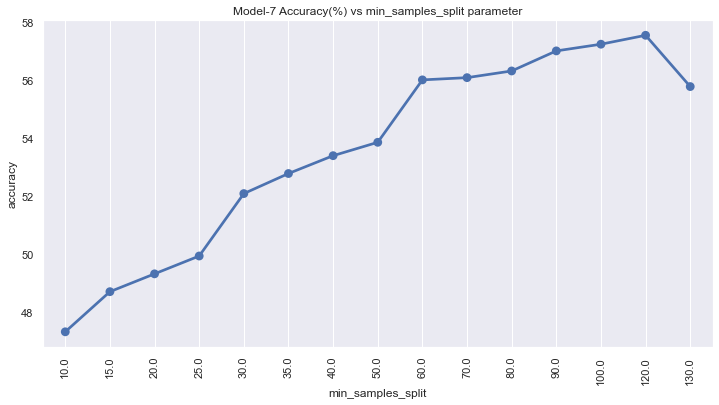

In [25]:
c_parameter_name = 'min_samples_split'
c_parameter_values = [10,15,20,25,30,35,40,50,60,70,80,90,100,120,130]
c_best_parameter = 0
c_best_accuracy = 0
c_worst_parameter = 0
c_worst_accuracy = 100
df = pd.DataFrame(columns=[c_parameter_name, 'accuracy'])
for input_parameter in c_parameter_values:
    model = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=input_parameter, random_state=35)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
        
    acc_score = accuracy_score(y_test,y_pred)*100
    
    df = df.append({c_parameter_name : input_parameter , 'accuracy' : acc_score}, ignore_index=True)
    
    if acc_score > c_best_accuracy:
        c_best_accuracy = acc_score
        c_best_parameter = input_parameter
        c_best_model = model
        
    if acc_score < c_worst_accuracy:
        c_worst_accuracy = acc_score
        c_worst_parameter = input_parameter
        c_worst_model = model
    
print(df)
print("")
plt.figure(figsize=(12,6))
sns.pointplot(x=c_parameter_name, y="accuracy", data=df)
title = 'Model-7 Accuracy(%) vs ' + c_parameter_name + ' parameter'
plt.title(title)
plt.xticks(rotation= 90)
plt.grid()

   min_samples_leaf   accuracy
0               5.0  48.307692
1              10.0  51.461538
2              15.0  52.769231
3              20.0  50.846154
4              25.0  53.461538
5              30.0  54.923077
6              35.0  57.000000
7              40.0  56.769231
8              50.0  56.307692
9              60.0  56.692308



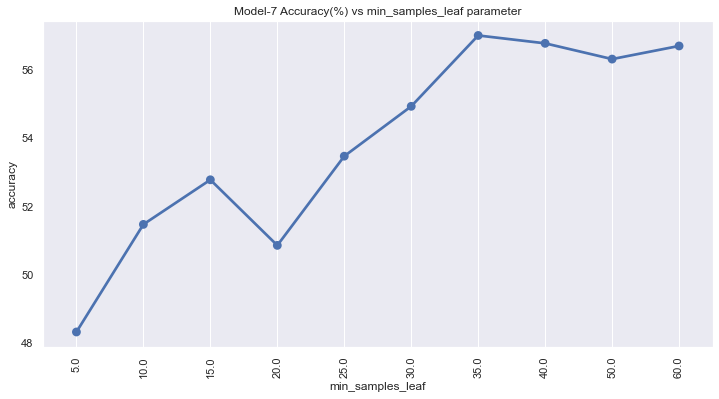

In [26]:
c_parameter_name = 'min_samples_leaf'
c_parameter_values = [5,10,15,20,25,30,35,40,50,60]
c_best_parameter = 0
c_best_accuracy = 0
c_worst_parameter = 0
c_worst_accuracy = 100
df = pd.DataFrame(columns=[c_parameter_name, 'accuracy'])
for input_parameter in c_parameter_values:
    model = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=input_parameter, random_state=35)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
        
    acc_score = accuracy_score(y_test,y_pred)*100
    
    df = df.append({c_parameter_name : input_parameter , 'accuracy' : acc_score}, ignore_index=True)
    
    if acc_score > c_best_accuracy:
        c_best_accuracy = acc_score
        c_best_parameter = input_parameter
        c_best_model = model
        
    if acc_score < c_worst_accuracy:
        c_worst_accuracy = acc_score
        c_worst_parameter = input_parameter
        c_worst_model = model
    
print(df)
print("")
plt.figure(figsize=(12,6))
sns.pointplot(x=c_parameter_name, y="accuracy", data=df)
title = 'Model-7 Accuracy(%) vs ' + c_parameter_name + ' parameter'
plt.title(title)
plt.xticks(rotation= 90)
plt.grid()

   max_leaf_nodes   accuracy
0             2.0  51.076923
1             3.0  56.307692
2             4.0  56.307692
3             5.0  56.307692
4             6.0  56.000000
5             7.0  56.000000
6             8.0  56.538462
7             9.0  56.538462
8            10.0  56.538462



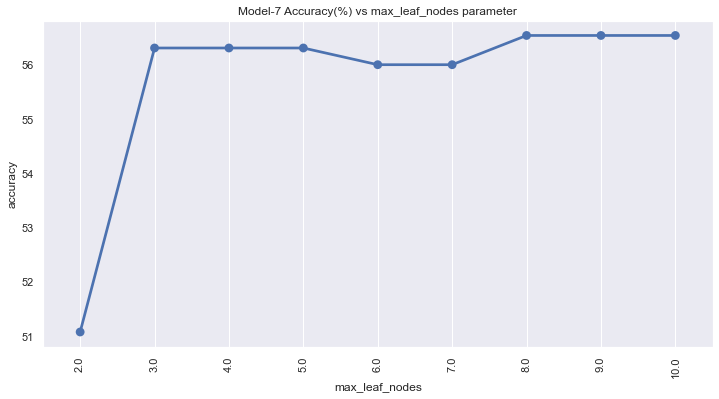

In [27]:
c_parameter_name = 'max_leaf_nodes'
c_parameter_values = [2,3,4,5,6,7,8,9,10]
c_best_parameter = 0
c_best_accuracy = 0
c_worst_parameter = 0
c_worst_accuracy = 100
df = pd.DataFrame(columns=[c_parameter_name, 'accuracy'])
for input_parameter in c_parameter_values:
    model = tree.DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=input_parameter, random_state=35)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
        
    acc_score = accuracy_score(y_test,y_pred)*100
    
    df = df.append({c_parameter_name : input_parameter , 'accuracy' : acc_score}, ignore_index=True)
    
    if acc_score > c_best_accuracy:
        c_best_accuracy = acc_score
        c_best_parameter = input_parameter
        c_best_model = model
        
    if acc_score < c_worst_accuracy:
        c_worst_accuracy = acc_score
        c_worst_parameter = input_parameter
        c_worst_model = model
    
print(df)
print("")
plt.figure(figsize=(12,6))
sns.pointplot(x=c_parameter_name, y="accuracy", data=df)
title = 'Model-7 Accuracy(%) vs ' + c_parameter_name + ' parameter'
plt.title(title)
plt.xticks(rotation= 90)
plt.grid()

   min_impurity_decrease   accuracy
0                 0.0005  48.692308
1                 0.0010  48.692308
2                 0.0020  47.538462
3                 0.0050  56.846154
4                 0.0100  56.000000
5                 0.0200  56.307692
6                 0.0500  56.307692



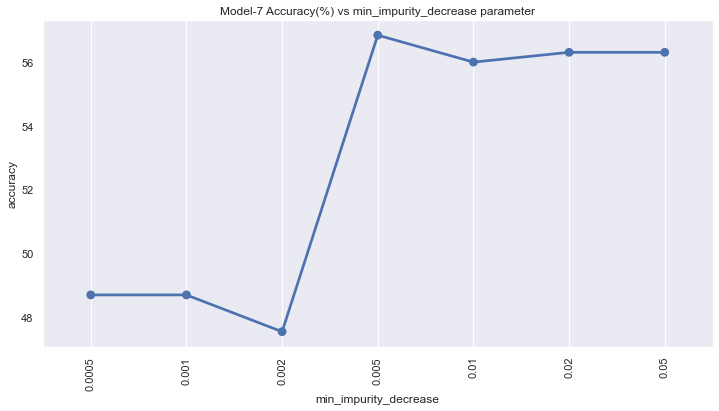

In [28]:
c_parameter_name = 'min_impurity_decrease'
c_parameter_values = [0.0005,0.001,0.002,0.005,0.01,0.02,0.05]
c_best_parameter = 0
c_best_accuracy = 0
c_worst_parameter = 0
c_worst_accuracy = 100
df = pd.DataFrame(columns=[c_parameter_name, 'accuracy'])
for input_parameter in c_parameter_values:
    model = tree.DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=input_parameter, random_state=35)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
        
    acc_score = accuracy_score(y_test,y_pred)*100
    
    df = df.append({c_parameter_name : input_parameter , 'accuracy' : acc_score}, ignore_index=True)
    
    if acc_score > c_best_accuracy:
        c_best_accuracy = acc_score
        c_best_parameter = input_parameter
        c_best_model = model
        
    if acc_score < c_worst_accuracy:
        c_worst_accuracy = acc_score
        c_worst_parameter = input_parameter
        c_worst_model = model
    
print(df)
print("")
plt.figure(figsize=(12,6))
sns.pointplot(x=c_parameter_name, y="accuracy", data=df)
title = 'Model-7 Accuracy(%) vs ' + c_parameter_name + ' parameter'
plt.title(title)
plt.xticks(rotation= 90)
plt.grid()

Our optimized parameters are:max_depth=5, min_samples_split=120, min_samples_leaf=35, max_leaf_nodes=8, and min_impurity_decrease=0.005.

In [29]:
#let's try our pruned model
pruned_model = tree.DecisionTreeClassifier(criterion='entropy', 
                                           splitter='random', 
                                           max_depth=5, 
                                           min_samples_split=120, 
                                           min_samples_leaf=35, 
                                           max_leaf_nodes=8, 
                                           min_impurity_decrease=0.005, 
                                           random_state=35)

pruned_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=8,
                       min_impurity_decrease=0.005, min_samples_leaf=35,
                       min_samples_split=120, random_state=35,
                       splitter='random')

In [30]:
#gathering the predictions
prediction = pruned_model.predict(x_test)

con_mat = confusion_matrix(y_test, prediction)
print(con_mat)
print('Accuracy Score :', accuracy_score(y_test, prediction) )

[[350   0 134]
 [145   0 187]
 [116   0 368]]
Accuracy Score : 0.5523076923076923


Text(0, -0.05, 'Decision Tree')

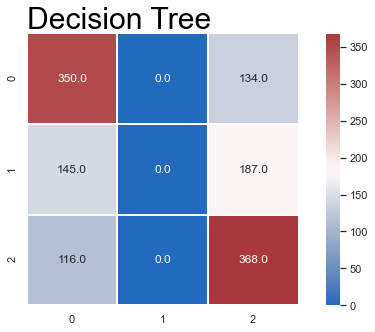

In [31]:
f, ax = plt.subplots(figsize=(10, 5))
_ = sns.heatmap(con_mat, annot=True, linewidths=1, ax=ax, cmap='vlag', fmt=".1f", square=True)
plt.text(0,-0.05, "Decision Tree", fontsize = 30, color='Black')

In [32]:
#classification matrix
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.57      0.72      0.64       484
           1       0.00      0.00      0.00       332
           2       0.53      0.76      0.63       484

    accuracy                           0.55      1300
   macro avg       0.37      0.49      0.42      1300
weighted avg       0.41      0.55      0.47      1300



In [33]:
# Visualize data 

import pydotplus
#from sklearn import tree (already imported)
import collections

dot_data = tree.export_graphviz(pruned_model,
                                feature_names=feature_cols,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('dec_tree.png')

True

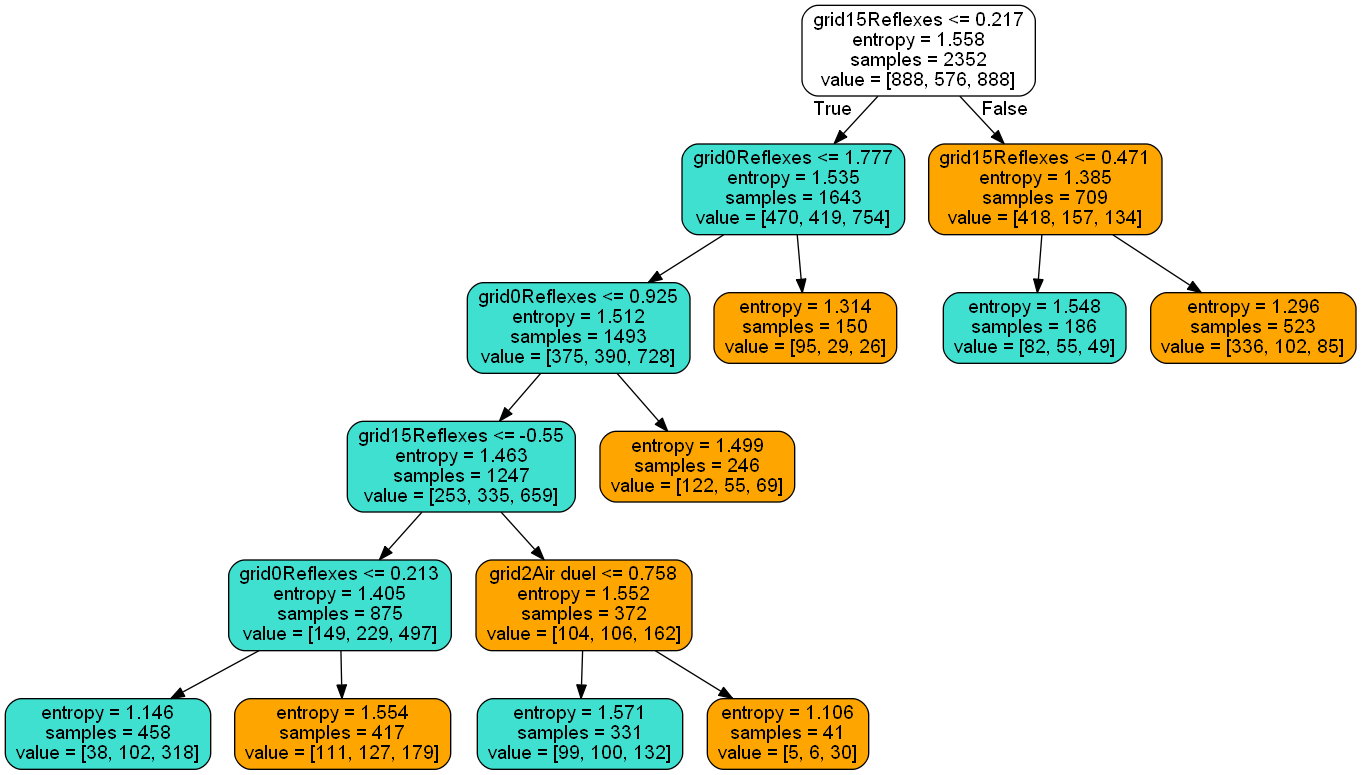

In [34]:
#display the png here
from IPython.display import Image

Image(filename='dec_tree.png') 

### 2.3 Random Forest

Apply our pruned model to a Random Forest.

In [35]:
#let's try our pruned model with Random Forest
pruned_model = RandomForestClassifier(max_depth=5, 
                                      min_samples_split=120, 
                                      min_samples_leaf=35,
                                      max_leaf_nodes=8,
                                      min_impurity_decrease=0.005,
                                      random_state=35)

pruned_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=8,
                       min_impurity_decrease=0.005, min_samples_leaf=35,
                       min_samples_split=120, random_state=35)

In [36]:
#gathering the predictions
prediction = pruned_model.predict(x_test)

con_mat = confusion_matrix(y_test, prediction)
print(con_mat)
print('Accuracy Score :', accuracy_score(y_test, prediction) )

[[364   0 120]
 [155   0 177]
 [ 98   0 386]]
Accuracy Score : 0.5769230769230769


Text(0, -0.05, 'Random Forest')

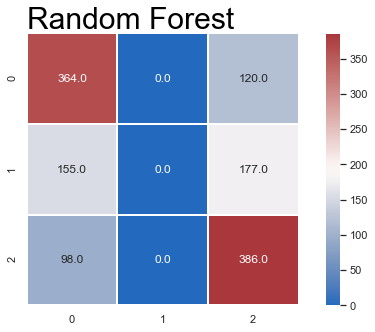

In [37]:
f, ax = plt.subplots(figsize=(10, 5))
_ = sns.heatmap(con_mat, annot=True, linewidths=1, ax=ax, cmap='vlag', fmt=".1f", square=True)
plt.text(0,-0.05, "Random Forest", fontsize = 30, color='Black')

In [38]:
#classification matrix
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.59      0.75      0.66       484
           1       0.00      0.00      0.00       332
           2       0.57      0.80      0.66       484

    accuracy                           0.58      1300
   macro avg       0.39      0.52      0.44      1300
weighted avg       0.43      0.58      0.49      1300



### 2.4 KNN

To start with the KNN model we will test for the optimal k-value.

In [39]:
from sklearn.neighbors import KNeighborsClassifier

# test values for k to see what looks best

scores = []
print(f'Features: {feature_cols} \nTarget: {prediction_col}')

for k in range(2, 20):
    model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    model.fit(x_train, y_train)
    scores.append(model.score(x_test, y_test))

Features: ['grid6Simple pass', 'grid6Touch', 'grid6Ground loose ball duel', 'grid6Ground attacking duel', 'grid6Ground defending duel', 'grid6Air duel', 'grid6Smart pass', 'grid6Shot', 'grid6Acceleration', 'grid6Head pass', 'grid6High pass', 'grid6Clearance', 'grid6Free Kick', 'grid6Free kick shot', 'grid6Free kick cross', 'grid11Simple pass', 'grid11Touch', 'grid11Ground loose ball duel', 'grid11Ground attacking duel', 'grid11Ground defending duel', 'grid11Air duel', 'grid11Smart pass', 'grid11Shot', 'grid11Acceleration', 'grid11Head pass', 'grid11Cross', 'grid11High pass', 'grid11Clearance', 'grid11Free Kick', 'grid11Free kick shot', 'grid11Free kick cross', 'grid10Simple pass', 'grid10Touch', 'grid10Ground loose ball duel', 'grid10Ground attacking duel', 'grid10Ground defending duel', 'grid10Air duel', 'grid10Smart pass', 'grid10Shot', 'grid10Acceleration', 'grid10Head pass', 'grid10Cross', 'grid10High pass', 'grid10Clearance', 'grid10Free Kick', 'grid10Free kick shot', 'grid10Free 

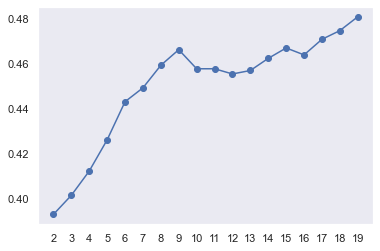

In [40]:
# display the resutls
plt.plot(range(2, 20), scores)
plt.scatter(range(2, 20), scores)
plt.grid()
_ =plt.xticks(range(2, 20))

Our optimal value for k is 19.

In [41]:
# define and fit our model
model = KNeighborsClassifier(n_neighbors=19, n_jobs=-1)
model.fit(x_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=19)

In [42]:
# gather the predictations that our model made for our test set
predictions = model.predict(x_test)

con_mat = confusion_matrix(y_test, predictions)
print(con_mat)
print('Accuracy Score :', accuracy_score(y_test, predictions) )

[[403  28  53]
 [239  30  63]
 [246  46 192]]
Accuracy Score : 0.4807692307692308


Text(0, -0.05, 'K-Nearest Neighbors')

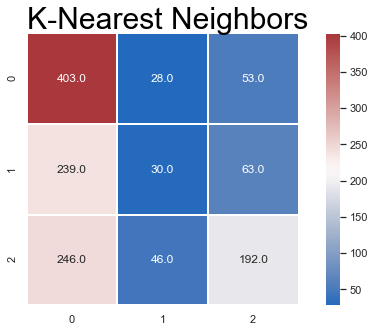

In [43]:
f, ax = plt.subplots(figsize=(10, 5))
_ = sns.heatmap(con_mat, annot=True, linewidths=1, ax=ax, cmap='vlag', fmt=".1f", square=True)
plt.text(0,-0.05, "K-Nearest Neighbors", fontsize = 30, color='Black')

In [44]:
#classification matrix
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.45      0.83      0.59       484
           1       0.29      0.09      0.14       332
           2       0.62      0.40      0.48       484

    accuracy                           0.48      1300
   macro avg       0.46      0.44      0.40      1300
weighted avg       0.47      0.48      0.43      1300



### 2.5  Neural Network
#### Grid search to find optimal parameters.

The grid seach method utilized below is based off of the code from: 
https://medium.com/@panjeh/scikit-learn-hyperparameter-optimization-for-mlpclassifier-4d670413042b

In [45]:
# Create a parameter list to optimize off of

parameter_space = {
    'max_iter':[100, 500, 1000],
    'hidden_layer_sizes': [(5,), (10,), (20,)],
    'activation': ['relu', 'tanh'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.01, 0.05],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}

In [46]:
x = games_train[feature_cols].values
y = games_train[prediction_col].values

# create the model and the grid search
model = MLPClassifier() 

clf = GridSearchCV(model, parameter_space, n_jobs=-1, cv=5)
clf.fit(x, y)

GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.01, 0.05],
                         'hidden_layer_sizes': [(5,), (10,), (20,)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'max_iter': [100, 500, 1000],
                         'solver': ['sgd', 'adam']})

In [47]:
# Best parameter set
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'max_iter': 500, 'solver': 'sgd'}


Use our optimal parameter set in the model.

In [48]:
model = MLPClassifier(hidden_layer_sizes=(20,), 
                      activation='relu', 
                      alpha=0.0001, 
                      learning_rate='adaptive', 
                      solver='sgd', 
                      max_iter=500)

#### Assess Training and Validation loss

Split the training data into train and validation sets.

In [49]:
#create validation set from the training set
x_trainV, x_val, y_trainV, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=35)

In [50]:
model.fit(x_trainV, y_trainV) 

train = model.loss_curve_

In [51]:
model.fit(x_val, y_val) 
val = model.loss_curve_

To assess the performance of the model we will look at the training and validation loss curves.

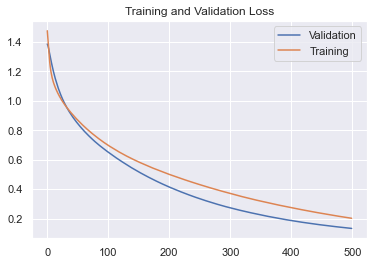

In [52]:
# training and validation loss curve
fig, ax = plt.subplots()
ax.set_title('Training and Validation Loss')
ax.plot(val, label='Validation')
ax.plot(train, label='Training')
ax.legend()

It doesn't appear that the training and validation loss are reaching stability. They are still pointing towards a downward trend, this is concerning in regards to the quality of our model.

#### Run optimal model

In [53]:
#fit the model to the training data
model.fit(x_train, y_train) 

MLPClassifier(hidden_layer_sizes=(20,), learning_rate='adaptive', max_iter=500,
              solver='sgd')

In [54]:
# make predictions
predictions = model.predict(x_test)  

#### Assess results

In [55]:
y_true, y_pred = y_test , model.predict(x_test)
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.66      0.69      0.67       484
           1       0.36      0.29      0.32       332
           2       0.65      0.71      0.68       484

    accuracy                           0.59      1300
   macro avg       0.56      0.56      0.56      1300
weighted avg       0.58      0.59      0.59      1300



In [56]:
con_mat = confusion_matrix(y_test, predictions)
print(con_mat)
print('Accuracy Score :', accuracy_score(y_test, predictions) )

[[334  90  60]
 [111  95 126]
 [ 62  78 344]]
Accuracy Score : 0.5946153846153847


Text(0, -0.05, 'Neural Network')

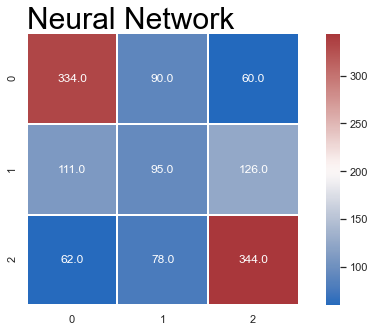

In [57]:
f, ax = plt.subplots(figsize=(10, 5))
_ = sns.heatmap(con_mat, annot=True, linewidths=1, ax=ax, cmap='vlag', fmt=".1f", square=True)
plt.text(0,-0.05, "Neural Network", fontsize = 30, color='Black')